# Top 100 Words Closest to "Queer" for Woolf

In [1]:
import gensim
from gensim.utils import simple_preprocess
from smart_open import smart_open
import os
from gensim import corpora
from pprint import pprint
from gensim.test.utils import datapath
from gensim import utils
from gensim.parsing.preprocessing import remove_stopwords, preprocess_string

In [3]:
#loading txt file and turning it into courpus

class MyCorpus:
    def __iter__(self):
        corpus_path = datapath('C:\\Users\\Heejoung Shin\\Documents\\Heejoung Files\\UIUC MSLIS\\IS417-Data Science in the Humanities\\Research Paper\\Data\\woolfcorpus.txt')    
        for line in open(corpus_path, encoding = 'latin-1'):
            yield gensim.utils.simple_preprocess(line)

import gensim.models

sentences = MyCorpus()

In [12]:
%%time
model = gensim.models.Word2Vec(sentences, iter=10)

Wall time: 45.2 s


In [13]:
# Save the model
model.save("woolf_word2vec.model")

In [14]:
# Load the model
model = gensim.models.Word2Vec.load("woolf_word2vec.model")

In [15]:
vector = model.wv['queer']  # get numpy vector of queer

In [109]:
sims = model.wv.most_similar('queer', topn=400)  # get top100 similar words
sims

[('odd', 0.6775972843170166),
 ('sad', 0.6604278683662415),
 ('handsome', 0.6500397324562073),
 ('silly', 0.6279616355895996),
 ('strange', 0.6113364696502686),
 ('stupid', 0.6075447797775269),
 ('oddly', 0.5975942611694336),
 ('disagreeable', 0.5906802415847778),
 ('beautiful', 0.5864154696464539),
 ('frightened', 0.5852103233337402),
 ('vague', 0.5844486355781555),
 ('gay', 0.5836688280105591),
 ('amusing', 0.5806790590286255),
 ('unlike', 0.5766662359237671),
 ('painful', 0.5757144689559937),
 ('ugly', 0.5714843273162842),
 ('shy', 0.5660457611083984),
 ('pretty', 0.5622310042381287),
 ('curious', 0.558978796005249),
 ('clever', 0.5576081275939941),
 ('humble', 0.5525555610656738),
 ('strangely', 0.5486600399017334),
 ('weak', 0.5482163429260254),
 ('pleasing', 0.548046350479126),
 ('foolish', 0.5454265475273132),
 ('extraordinarily', 0.543839156627655),
 ('interesting', 0.5422976613044739),
 ('awkward', 0.5396734476089478),
 ('chuckle', 0.5393359661102295),
 ('evident', 0.537190198

In [63]:
import pandas as pd
df = pd.DataFrame(sims) # make sims a dataframe
df_new = df.rename(columns={'words': '0', 'similarity score': '1'})

In [70]:
woolf_queersimilar = df_new[0].tolist()
#woolf_queersimilar # get top 100 words as a list
woolf_queersimilar.append('queer')
#add 'queer' to list

['odd',
 'sad',
 'handsome',
 'silly',
 'strange',
 'stupid',
 'oddly',
 'disagreeable',
 'beautiful',
 'frightened',
 'vague',
 'gay',
 'amusing',
 'unlike',
 'painful',
 'ugly',
 'shy',
 'pretty',
 'curious',
 'clever',
 'humble',
 'strangely',
 'weak',
 'pleasing',
 'foolish',
 'extraordinarily',
 'interesting',
 'awkward',
 'chuckle',
 'evident',
 'sensible',
 'wonderful',
 'nice',
 'unhappy',
 'prominent',
 'stimulating',
 'remarkable',
 'charming',
 'ridiculous',
 'marvellous',
 'comfortable',
 'intelligent',
 'sepulchral',
 'ludicrous',
 'big',
 'tragic',
 'stunted',
 'different',
 'cruel',
 'centred',
 'lovely',
 'unconcerned',
 'witty',
 'clumsy',
 'fond',
 'unusual',
 'laughable',
 'serious',
 'happy',
 'insignificant',
 'dingy',
 'obvious',
 'angry',
 'singular',
 'miserable',
 'awfully',
 'astonishingly',
 'remote',
 'solemn',
 'recalling',
 'flushed',
 'melancholy',
 'timid',
 'puzzled',
 'jolly',
 'permanently',
 'exhausting',
 'unpleasant',
 'lazy',
 'feeble',
 'remarkab

### Catagorizing Sentiments from a List of Top 100 Words Closest to Queer

In [71]:
with open('C:\\Users\\Heejoung Shin\\Documents\\Heejoung Files\\UIUC MSLIS\\IS417-Data Science in the Humanities\\Research Paper\\Data\\liunegative.txt', encoding = 'utf-8') as f:
    negative_words = [x.strip() for x in f.readlines()]
    
with open('C:\\Users\\Heejoung Shin\\Documents\\Heejoung Files\\UIUC MSLIS\\IS417-Data Science in the Humanities\\Research Paper\\Data\\liupositive.txt', encoding = 'utf-8') as f:
    positive_words = [x.strip() for x in f.readlines()]

In [72]:
%matplotlib notebook
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE
from pathlib import Path
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cosine
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [73]:
#turn my list into a data frame where each row represents an embedding.

vectordict = dict()
for v in woolf_queersimilar:
    vectordict[v] = model.wv[v]

In [74]:
vectordf = pd.DataFrame.from_dict(vectordict, orient = 'index')
vectordf.tail(100)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
sad,-0.294255,-0.647356,-0.451739,0.001373,0.044545,-0.362835,-0.350165,-0.319014,-0.152558,-0.008895,...,0.326169,-0.287990,0.166082,0.586307,0.186065,-0.182861,0.247121,-0.055495,-0.621638,0.231289
handsome,0.216542,-0.620133,-0.525004,0.251663,0.262714,-0.315550,-0.168549,-0.483667,-0.290480,0.285761,...,-0.592211,0.227529,0.186266,0.353609,0.372315,-0.812288,0.405496,0.000514,-0.729615,0.256634
silly,-0.566880,0.514410,-0.392494,0.239546,0.334719,0.261925,-0.211761,-0.306776,-0.118453,0.172177,...,0.220931,-0.407568,0.019172,-0.398248,0.063753,-0.272288,-0.250988,0.152071,-0.286340,0.630827
strange,-1.467574,-0.382867,-0.767074,-0.156627,1.167938,-0.172845,-0.479956,0.280695,-0.851748,-0.465142,...,0.695815,-0.896585,0.607853,0.226854,0.386746,-0.116423,-0.348376,0.165615,-0.694717,1.204209
stupid,-0.137872,0.108838,-0.367389,0.171527,-0.033239,0.237662,-0.150434,-0.298209,-0.183894,0.030652,...,0.074919,-0.068264,0.433977,0.690192,0.193150,-0.208254,-0.280215,0.145414,-0.248058,0.432017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
worried,0.076723,0.039713,-0.291415,-0.039150,0.012942,-0.199175,0.060710,-0.332786,0.010746,0.014685,...,-0.169731,-0.001218,0.150081,0.477466,0.057402,-0.210033,0.179444,0.316529,-0.133011,0.056614
keenly,-0.118435,-0.183006,0.079646,-0.138374,0.061216,-0.279106,-0.188595,-0.065709,-0.034382,-0.026314,...,0.040750,0.140782,0.433281,-0.059429,0.063785,-0.460209,-0.253578,0.261484,-0.007308,0.175816
wry,0.000675,-0.052817,-0.131882,-0.037758,-0.111739,-0.051854,0.034107,-0.148257,0.116530,-0.074994,...,0.050133,-0.005697,0.118188,0.116679,-0.045308,-0.005176,0.063090,0.098453,0.084302,0.012282
kindly,0.210282,0.186164,-0.161840,0.215431,-0.028603,-0.277653,0.140553,-0.116118,-0.259106,-0.099015,...,-0.212570,0.011548,0.139859,0.196599,0.115144,-0.070453,-0.322397,0.033640,-0.496310,0.277192


In [75]:
#use dimension-reduction techniques to flatten it into a plane
def vocab2pca(woolf_queersimilar):
    
    vectordict = dict()
    for v in woolf_queersimilar:
        vectordict[v] = model.wv[v]
        
    vectordf = pd.DataFrame.from_dict(vectordict, orient = 'index')
    
    vectorlengths = np.linalg.norm(vectordf, ord = 2, axis = 1)   # normalize vector lengths
    vectordf = vectordf.divide(vectorlengths, axis = 'rows')      # for PCA
    
    pca = PCA(n_components = 2)       
    components = pca.fit_transform(vectordf)                      # perform PCA
    plotframe = pd.DataFrame({'x': components[ : , 0], 'y': components[ : , 1]}, index = woolf_queersimilar)
    
    return plotframe

In [76]:
plotframe = vocab2pca(woolf_queersimilar)
plotframe

,x,y
odd,-0.229188,0.045241
sad,-0.063154,-0.150996
handsome,-0.008923,-0.322391
silly,-0.357099,0.100478
strange,-0.198531,0.361665
...,...,...
worried,0.119985,-0.387304
keenly,0.274102,0.116959
wry,0.281735,-0.181590
kindly,-0.168798,-0.159383


In [77]:
negativelist_woolf = [w for w in woolf_queersimilar if w in negative_words]
#negativelist_woolf.remove('queer')
positivelist_woolf = [w for w in woolf_queersimilar if w in positive_words]
neutrallist_woolf = [w for w in woolf_queersimilar if w not in (negative_words + positive_words)]

In [80]:
plotframe_negative_woolf = vocab2pca(negativelist_woolf)
plotframe_positive_woolf = vocab2pca(positivelist_woolf)
plotframe_neutral_woolf = vocab2pca(neutrallist_woolf)
plotframe_negative_woolf
plotframe_queer_woolf = plotframe_negative_woolf[(plotframe_negative_woolf.index == 'queer')] #save 'queer' in separate dataframe
plotframe_negative_woolf = plotframe_negative_woolf.drop(['queer']) #drop 'queer' from plotframe_negative_woolf
plotframe_negative_woolf['sentiment']='negative' #add sentiment columns 
plotframe_positive_woolf['sentiment']='positive'
plotframe_neutral_woolf['sentiment']='neutral'
plotframe_queer_woolf['sentiment']='queer'
plotframe_sentiment = pd.concat([plotframe_negative_woolf,plotframe_positive_woolf,plotframe_neutral_woolf,plotframe_queer_woolf]) #combine dataframes for plot
plotframe_sentiment

,x,y,sentiment
odd,-0.335001,-0.184237,negative
sad,-0.101636,-0.027596,negative
silly,-0.340959,-0.227610,negative
strange,-0.098358,-0.483290,negative
stupid,-0.198939,-0.065737,negative
...,...,...,...
connected,0.346402,0.177618,neutral
pleasantest,-0.036167,-0.089186,neutral
particularly,0.339273,0.186878,neutral
wry,-0.186387,0.447779,neutral


### Visualization

In [104]:
def plot_the_frame(plotframe_sentiment):    
    plt.figure(figsize = (15, 12))
    color_dict = dict({'positive':'green', 'neutral':'blue','negative':'red','queer':'purple'})
    theplot = sns.scatterplot(x = plotframe_sentiment.iloc[ : , 0], y = plotframe_sentiment.iloc[ : , 1], hue=plotframe_sentiment.iloc[ : , 2], palette=color_dict)
    collabels = plotframe_sentiment.columns.tolist()
    theplot.set(xlabel = collabels[0], ylabel = collabels[1])


    for rownum in range(plotframe_sentiment.shape[0]):
        x = plotframe_sentiment.iloc[rownum, 0]
        y = plotframe_sentiment.iloc[rownum, 1]
        theplot.text(x + 0.007, y + .007, 
        plotframe_sentiment.index[rownum], horizontalalignment='left', 
        size='small', color='black', fontsize=9, weight='semibold')

    plt.title('Sentiments of the Top 100 Words Closest to Queer (Woolf)', fontsize=12)
    plt.savefig('queersentiment_woolf.png')
    plt.show()

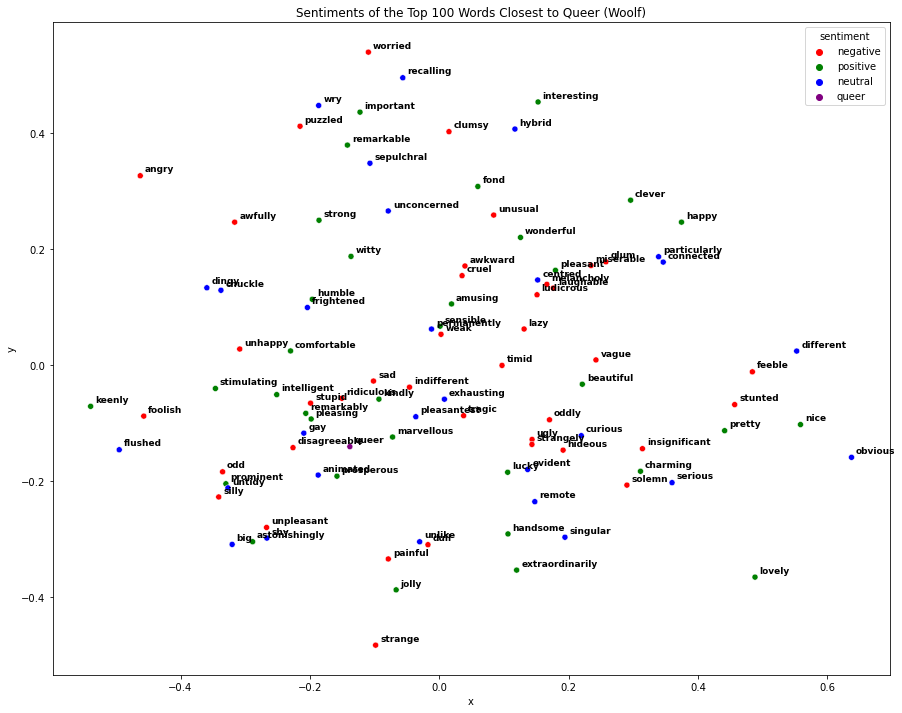

In [105]:
plot_the_frame(plotframe_sentiment)